<a href="https://colab.research.google.com/github/beltranovich/MBID_08_AG3/blob/main/MBID_08_AG3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

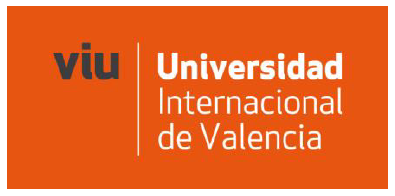

<center> <h1>MASTER UNIVERSITARIO EN BIG DATA Y CIENCIA DE DATOS</h1> </center>
<center> <h2>MBID_08: VISUALIZACIÓN DE DATOS</h2> </center>
<center> <h4>AG3 (2da Convocatoria)</h4> </center>
<!--------------------------------------------------------------------------->
<b>Nombre:</b>
<span> Beltrán Villamizar, Leonardo Antonio</span>
</br>
<b>GitHub:</b>
<span>
  <a href="https://github.com/beltranovich/MBID_08_AG3" target="_blank">
    https://github.com/beltranovich/MBID_08_AG3
  </a>
</span>
</br>
<!--------------------------------------------------------------------------->

Importación de módulos y librerias requeridas para ejecutar los pasos de la actividad guiada #3

In [ ]:
# Importación de las librerias
import pandas as pd
import io
import requests
import seaborn as sns
import timeit
import matplotlib.pyplot as plt

Realizar la lectura online del fichero CSV para establecerlo como fuente de datos en el DataFrame de la practica

In [ ]:
# Creación del Dataframe cargando datos de un archivo csv en linea
url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
s=requests.get(url).content
titanic=pd.read_csv(io.StringIO(s.decode('utf-8')))

Primer acercamiento de los datos:
Visualizar con la instrucción .info() la información relevante del Dataframe:
- nombre de las columnas  
- tipos de datos  
- cantidad de columnas  
- cantidad de filas
- conteo de valores no nulos

In [ ]:
# Información del dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


Observación de datos perdidos por cada columna:

In [ ]:
# Revisión de 'Missing Values'
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Tambien se puede calcular en porcentaje:

In [ ]:
# Expresando los missing values en porcentaje con respecto al total de los datos
(titanic.isnull().sum())/(len(titanic))*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

Con la exploración de datos podemos aplicar transformaciones ded atos sencillas como renombrar columnas para nuestro entendimiento:

In [ ]:
# Renombrar columnas class=clase y fare=tarifa
titanic.rename(columns={'class':'clase','fare':'tarifa'},inplace=True)

# Cabecero de filas del Dataframe
titanic.head()

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# Muestra los distintos valores (categoria) para la variable class
titanic.clase.unique()

array(['Third', 'First', 'Second'], dtype=object)

Podemos crear columnas nuevas que nos ayuden con analisis y entendimiento de los datos:

In [ ]:
# Añadimos nuevas columnas: is_old, is_baby
def is_old_func(row):
  return row['age'] > 60
titanic['is_old'] = titanic.apply(is_old_func, axis='columns')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False


In [ ]:
# Otra forma de definir una nueva columna
titanic.eval ('is_baby = age<15',inplace=True)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False,False


Con la columna de la clase se puede crear una nueva columna que represente las tres clases de manera númerica

In [ ]:
# Definir una variable numérica: class_num
def class_num_func(row):
  Clase={'First':1,'Second':2,'Third':3}
  return Clase[row.clase]

titanic['class_num'] = titanic.apply(class_num_func, axis='columns')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby,class_num
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False,False,3
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False,False,3
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False,False,3


Se pueden realizar consultas al DataFrame evaluando condiciones, por ejemplo:
- mujeres mayores a 45 años que no hayan sobrevivido

In [ ]:
# Consulta con condiciones
titanic[
    (titanic.sex == 'female')
    & (titanic['clase'].isin(['First', 'Third']))
    & (titanic.age>45 )
    & (titanic.survived==0)
]

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby,class_num
132,0,3,female,47.0,1,0,14.5000,S,Third,woman,False,NaN,Southampton,no,False,False,False,3
177,0,1,female,50.0,0,0,28.7125,C,First,woman,False,C,Cherbourg,no,True,False,False,1
736,0,3,female,48.0,1,3,34.3750,S,Third,woman,False,NaN,Southampton,no,False,False,False,3


Ahora podemos crear visualizaciones usando la libreria seaborn:

<b>Distribución de Pasajeros por Clase en el Titanic:</b>

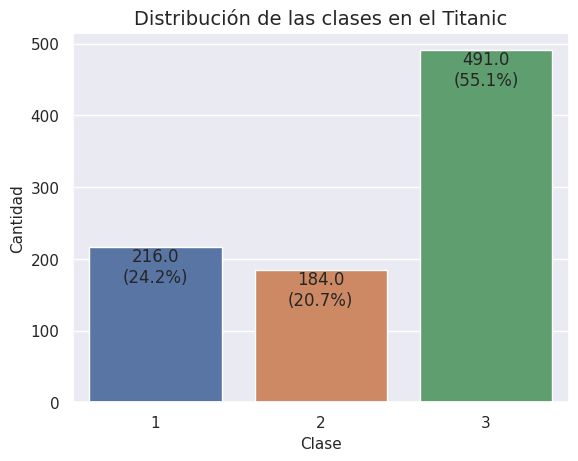

In [ ]:
# Crear la gráfica de distribución de las clases
sns.set(style="darkgrid")  # Establecer el estilo de la gráfica
ax = sns.countplot(x="pclass", data=titanic)

# Personalizar el aspecto de la gráfica
ax.set_title("Distribución de las clases en el Titanic", fontsize=14)  # Título de la gráfica
ax.set_xlabel("Clase", fontsize=11)  # Nombre del eje x
ax.set_ylabel("Cantidad", fontsize=11)  # Nombre del eje y

# Añadir etiquetas a las barras
total_count = len(titanic)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height}\n({height/total_count:.1%})", (p.get_x() + p.get_width() / 2, height),
                ha='center', va='top')

# Mostrar la gráfica
plt.show()

En esta visualización, se muestra la distribución de pasajeros por clase en el Titanic. El eje x representa las clases y el eje y representa la cantidad de pasajeros. Utilizamos un gráfico de barras para ilustrar claramente la cantidad de pasajeros en cada clase.
___


<b>Distribución de la edad de los Pasajeros:</b>

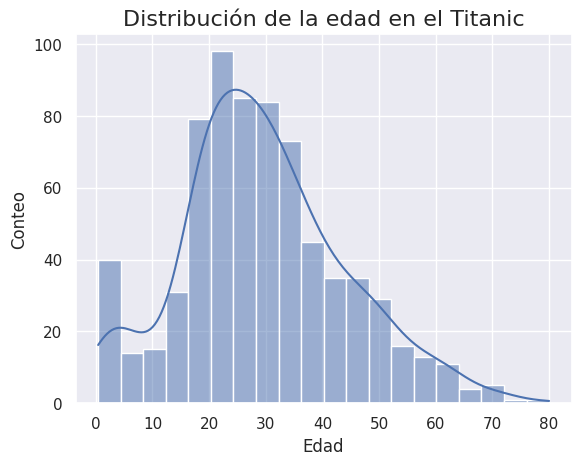

In [ ]:
# Crear la gráfica de distribución de la edad
sns.set(style="darkgrid")  # Establecer el estilo de la gráfica
sns.histplot(data=titanic, x='age', kde=True)

# Personalizar el aspecto de la gráfica
plt.title("Distribución de la edad en el Titanic", fontsize=16)  # Título de la gráfica
plt.xlabel("Edad", fontsize=12)  # Nombre del eje x
plt.ylabel("Conteo", fontsize=12)  # Nombre del eje y

# Mostrar la gráfica
plt.show()

En esta visualización, se muestra la distribución de la edad de los pasajeros en el Titanic. Utilizamos un histograma con una estimación de densidad kernel (KDE) para representar la distribución de la edad.
___________________


<b>Distrubición de la edad en función del genero y la clase:</b>

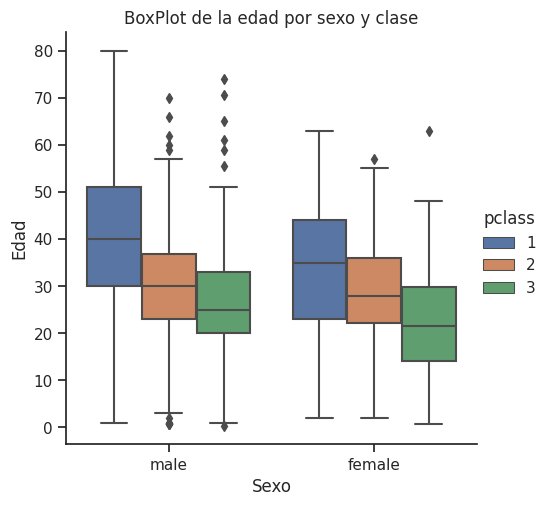

In [ ]:
# BoxPlot de la edad por sexo y clase
with sns.axes_style(style='ticks'):
    ax = sns.catplot(data=titanic, x='sex', y='age', hue='pclass', kind='box')

# Personalizar el aspecto de la gráfica
ax.set(title="BoxPlot de la edad por sexo y clase",
       xlabel="Sexo",
       ylabel="Edad")

En esta gráfica, se muestra la distribución de la edad en función del sexo y la clase de pasajero en el Titanic. Los boxplots nos permiten comparar la mediana, los cuartiles y los valores atípicos entre las diferentes categorías.
_________________

<b>Distribución cruzada Edad y Tarifa</b>

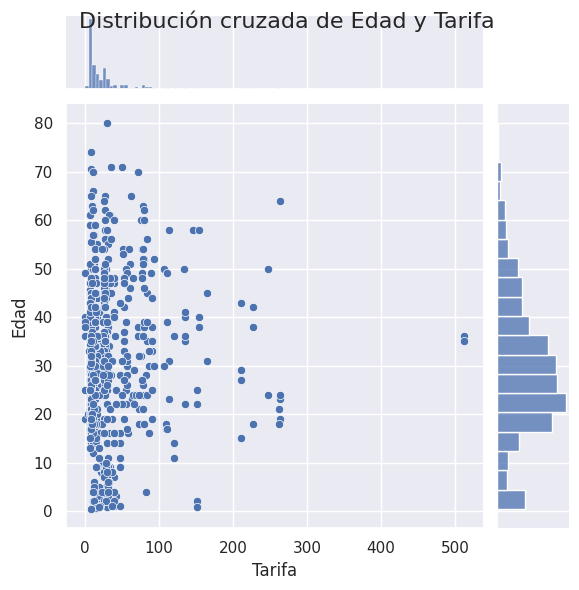

In [ ]:
# Personalizar el aspecto de la gráfica
sns.set(style="darkgrid")  # Establecer el estilo de la gráfica
g = sns.jointplot(x='tarifa', y='age', data=titanic, kind='scatter')

# Personalizar el aspecto de la gráfica
g.set_axis_labels("Tarifa", "Edad", fontsize=12)  # Nombres de los ejes
g.fig.suptitle("Distribución cruzada de Edad y Tarifa", fontsize=16)  # Título de la gráfica

# Mostrar la gráfica
plt.show()

In [ ]:
#Cambiamos el font
sns.set(font_scale=1)

<b>Distribución de la edad según la categorías: survived, clase</b>

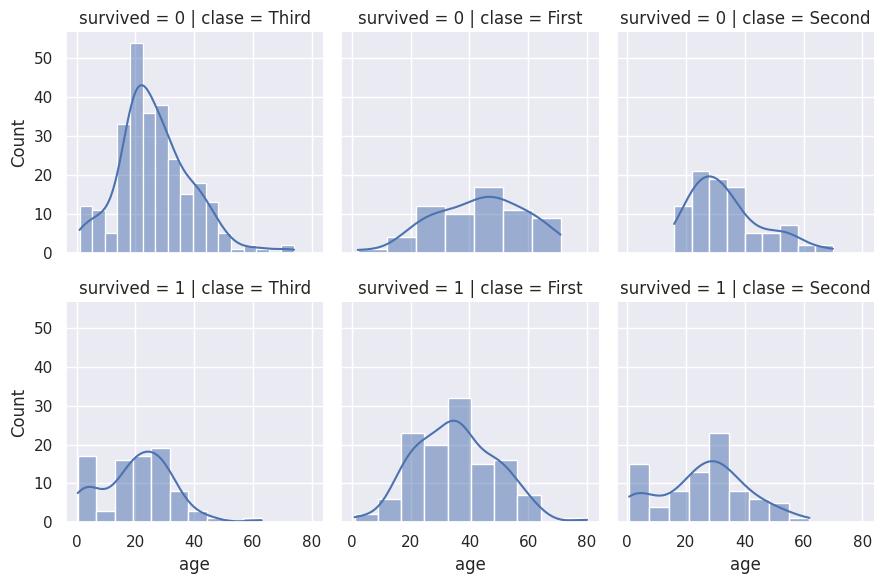

In [ ]:
# FacetGrid - Construir una matriz de gráficos
g = sns.FacetGrid(titanic, row='survived', col='clase')
g.map(sns.histplot,'age', kde=True)
plt.show()

______________

<b>Diagrama de dispersion con Distribucion de cada variable: tarifa / edad</b>

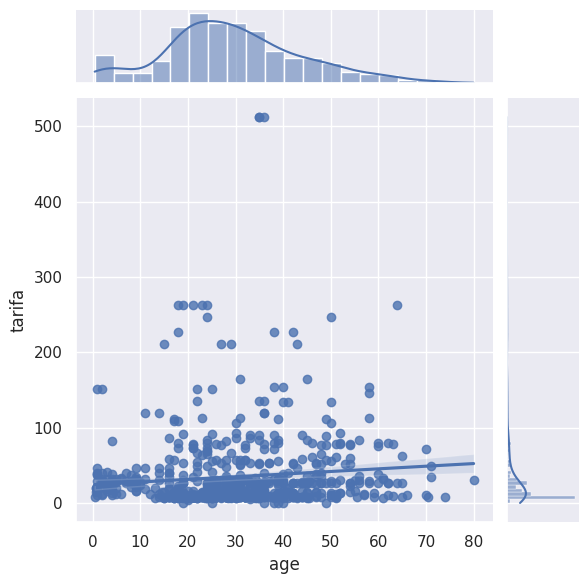

In [ ]:
# Diagrama de dispersion con Distribucion de cada variable: fare(precio)/age(edad)
sns.jointplot(data=titanic, x='age', y='tarifa', kind='reg', color='b')
plt.show()

_________________

<b>Análisis de Correlación</b>
</br>
Se realizará un análisis de correlaciones para explorar las relaciones entre las diferentes variables presentes en el conjunto de datos. El objetivo es identificar posibles asociaciones o dependencias entre las variables que puedan ser relevantes en analisis posteriores

In [ ]:
# función para realizar correlación visual
def analyze_correlation(dataframe):
    # Crear la matriz de correlación
    correlation_matrix = dataframe.corr()

    # Graficar mediante mapa de calor la matriz
    plt.figure(figsize=(9, 7))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"fontsize": 8})
    plt.title("Correlation Matrix")
    plt.show()

<ipython-input-26-703f9a47e51a>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataframe.corr()


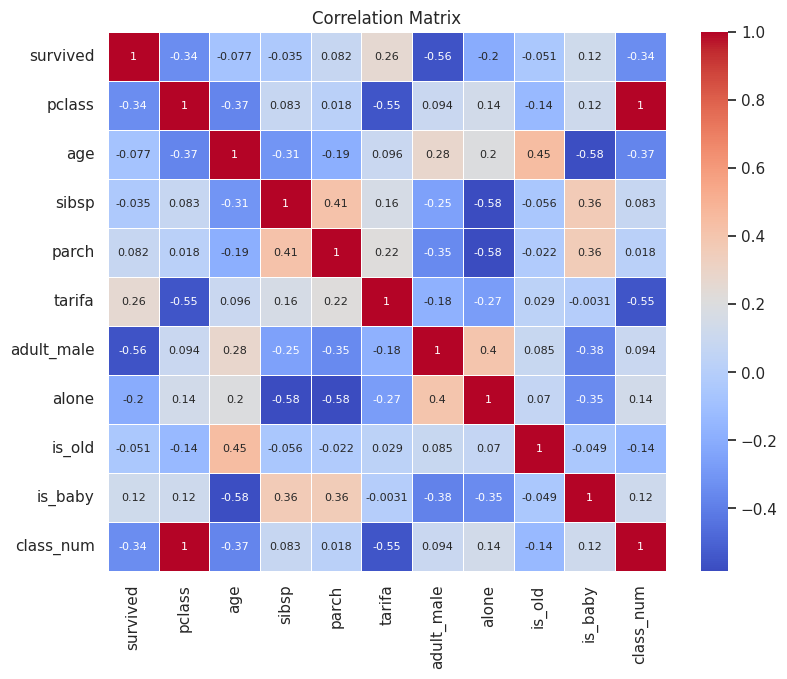

In [ ]:
analyze_correlation(titanic)

__________________

<b>Diagramas de dispersión de parejas de variables cuantitativas</b>

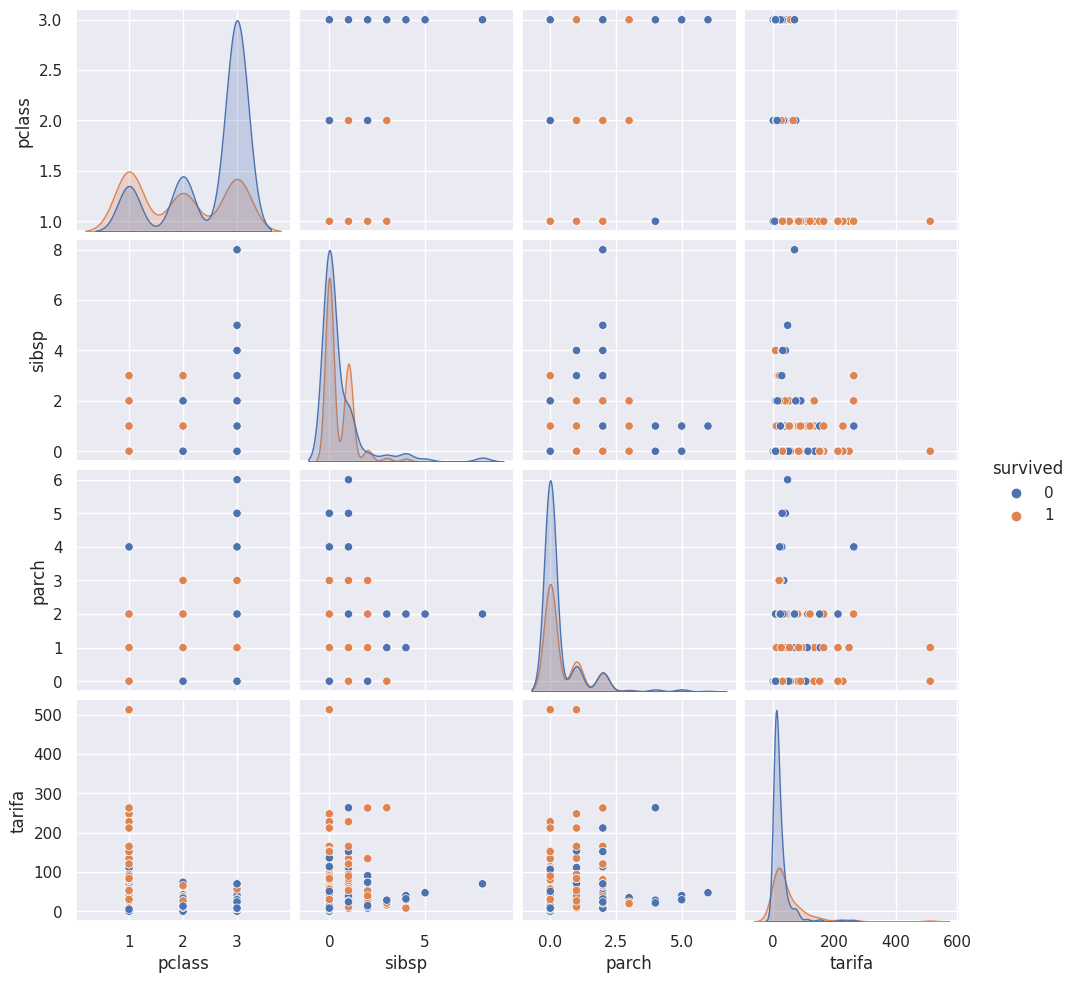

In [ ]:
# Define un subconjuto de datos con las variables numéricas
titanic_num = titanic[['survived','pclass','sibsp','parch','tarifa']]

# Hace una matriz de diagramas de dispersión de parejas de variables
sns.pairplot(titanic_num, hue="survived")

plt.show()

Ahora un ejemplo con el dataset Iris:

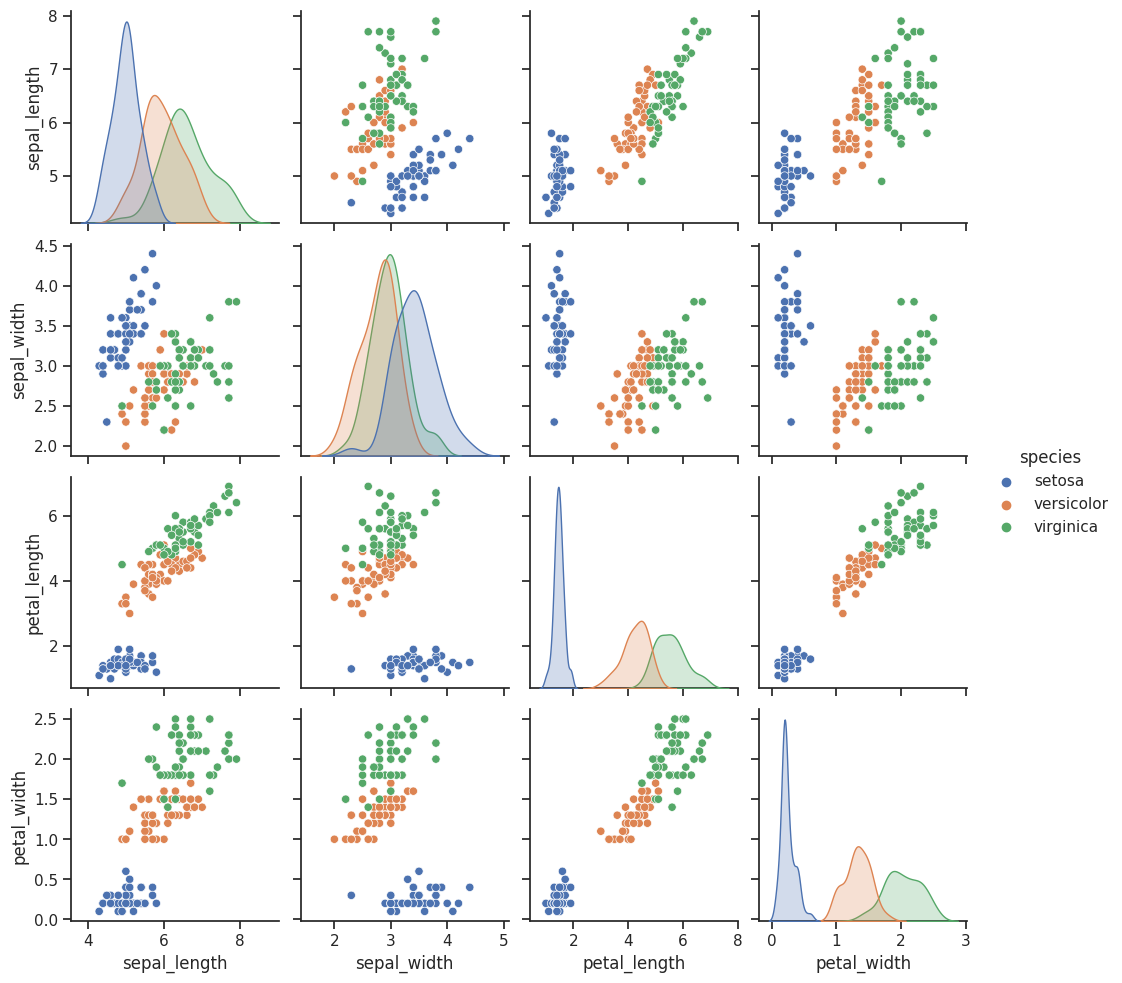

In [ ]:
# Establece el estilo estético de las tramas
sns.set(style="ticks")

# Carga el data set
df = sns.load_dataset("iris")

# matriz de diagramas de dispersion
sns.pairplot(df, hue="species")

____________________

<b>Diagramas de distribución de clase/edad y supervivientes:</b> - Parte Adicional
</br>
</br>
En la siguiente visualización, presentamos un análisis de la supervivencia en el Titanic en función de la edad de los pasajeros, separados por sexo y clase de pasajero. Utilizamos una gráfica de histogramas con facetas para mostrar la distribución de las edades en cada grupo.

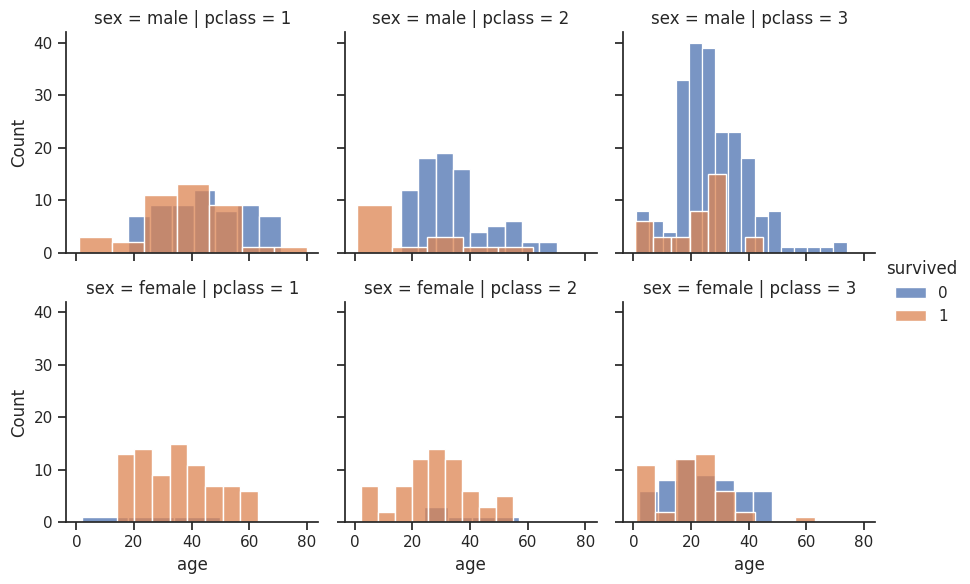

In [ ]:
# Crear la gráfica de histogramas con facetas
g = sns.FacetGrid(titanic, row='sex', col='pclass', hue='survived')

# Mapear la función de histograma con leyenda
g.map(sns.histplot, 'age', kde=False, legend=True)

# Ajustar las leyendas de las facetas
g.add_legend()

# Mostrar el diagrama
plt.show()